# Library Usage EDA
In this notebook you will perform EDA on a San Francisco Library dataset. Your goal is to complete EDA in a similar manner as was done on the diamonds dataset.

In [49]:
import pandas as pd
pd.options.display.max_colwidth = 40
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
library = pd.read_csv('../data/library.csv')
library.head()

,Patron Type,Age Range,Home Library,Active Date,Checkouts,Renewals,Notice Preference,Year Patron Registered,Outside of County
0,ADULT,25 to 34 years,Parkside,2013-07-01,19,7,email,2003,False
1,ADULT,35 to 44 years,Main Library,2013-12-01,55,0,email,2010,False
2,ADULT,35 to 44 years,Parkside,2014-08-01,2,1,email,2012,False
3,ADULT,45 to 54 years,Richmond,2015-10-01,11,8,email,2014,False
4,ADULT,55 to 59 years,Merced,2016-07-01,1096,18,phone,2003,False


In [4]:
!ls -ltr ../data

total 51952
drwxr-xr-x@ 16 yuejin  staff       512 Sep 13 06:05 tidy
-rwxr-xr-x@  1 yuejin  staff       256 Sep 13 06:05 sample_data.csv
-rwxr-xr-x@  1 yuejin  staff    366130 Sep 13 06:05 sales.csv
-rwxr-xr-x@  1 yuejin  staff     25509 Sep 13 06:05 nyc_deaths.csv
-rwxr-xr-x@  1 yuejin  staff    749344 Sep 13 06:05 newsgroups.csv
-rwxr-xr-x@  1 yuejin  staff   1171125 Sep 13 06:05 movie.csv
-rwxr-xr-x@  1 yuejin  staff    283141 Sep 13 06:05 member_info.csv
-rwxr-xr-x@  1 yuejin  staff    745182 Sep 13 06:05 member_groups.csv
drwxr-xr-x@  5 yuejin  staff       160 Sep 13 06:05 matplotlib
-rwxr-xr-x@  1 yuejin  staff      1043 Sep 13 06:05 library_data_dictionary.csv
-rwxr-xr-x@  1 yuejin  staff   1387399 Sep 13 06:05 library.csv
-rwxr-xr-x@  1 yuejin  staff     55628 Sep 13 06:05 insurance.csv
-rwxr-xr-x@  1 yuejin  staff   7256291 Sep 13 06:05 flights.csv
drwxr-xr-x@  3 yuejin  staff        96 Sep 13 06:05 extra
-rwxr-xr-x@  1 yuejin  staff    180798 Sep 13 06:05 employee.csv
-rwxr-x

In [14]:
libr = pd.read_csv('../data/library_data_dictionary.csv', index_col='column_name')
libr

,description
column_name,
Patron Type,"Description of patron (adult, teen, child, sen..."
Age Range,"Age ranges: 0 to 9 years, 10 to 19 years, 20 t..."
Home Library,Description of the branch library where the pa...
Active Date,Date the patron last checked out library mater...
Checkouts,Total number of items the patron has checked o...
Renewals,Total number of times the patron has renewed c...
Notice Preference,Description of the patron’s preferred method o...
Year Patron Registered,Year patron registered with library system. No...
Outside of County,If a patron's home address is not in San Franc...


In [15]:
library.dtypes

Patron Type               object
Age Range                 object
Home Library              object
Active Date               object
Checkouts                  int64
Renewals                   int64
Notice Preference         object
Year Patron Registered     int64
Outside of County           bool
dtype: object

In [16]:
libr['Data Type'] = library.dtypes #indexes auto-align

In [17]:
libr

,description,Data Type
column_name,,
Patron Type,"Description of patron (adult, teen, child, sen...",object
Age Range,"Age ranges: 0 to 9 years, 10 to 19 years, 20 t...",object
Home Library,Description of the branch library where the pa...,object
Active Date,Date the patron last checked out library mater...,object
Checkouts,Total number of items the patron has checked o...,int64
Renewals,Total number of times the patron has renewed c...,int64
Notice Preference,Description of the patron’s preferred method o...,object
Year Patron Registered,Year patron registered with library system. No...,int64
Outside of County,If a patron's home address is not in San Franc...,bool


In [21]:
library.head(3)

,Patron Type,Age Range,Home Library,Active Date,Checkouts,Renewals,Notice Preference,Year Patron Registered,Outside of County
0,ADULT,25 to 34 years,Parkside,2013-07-01,19,7,email,2003,False
1,ADULT,35 to 44 years,Main Library,2013-12-01,55,0,email,2010,False
2,ADULT,35 to 44 years,Parkside,2014-08-01,2,1,email,2012,False


In [24]:
c, o, n = 'continuous', 'ordinal', 'nominal' # assign
d = {'Patron Type':n, 'Age Range':o, 'Home Library':o, 'Active Date':c, 
     'Checkouts':c, 'Renewals':c, 'Notice Preference':n, 
    'Year Patron Registered':c, 'Outside of County': n}
libr['Data Type Info'] = pd.Series(d)
libr

,description,Data Type,Data Type Info
column_name,,,
Patron Type,"Description of patron (adult, teen, ...",object,nominal
Age Range,"Age ranges: 0 to 9 years, 10 to 19 y...",object,ordinal
Home Library,Description of the branch library wh...,object,ordinal
Active Date,Date the patron last checked out lib...,object,continuous
Checkouts,Total number of items the patron has...,int64,continuous
Renewals,Total number of times the patron has...,int64,continuous
Notice Preference,Description of the patron’s preferre...,object,nominal
Year Patron Registered,Year patron registered with library ...,int64,continuous
Outside of County,If a patron's home address is not in...,bool,nominal


In [26]:
library.shape

(21172, 9)

In [27]:
library.isna().sum()

Patron Type                  0
Age Range                   17
Home Library                 0
Active Date               3391
Checkouts                    0
Renewals                     0
Notice Preference            0
Year Patron Registered       0
Outside of County            0
dtype: int64

In [28]:
library.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21172 entries, 0 to 21171
Data columns (total 9 columns):
Patron Type               21172 non-null object
Age Range                 21155 non-null object
Home Library              21172 non-null object
Active Date               17781 non-null object
Checkouts                 21172 non-null int64
Renewals                  21172 non-null int64
Notice Preference         21172 non-null object
Year Patron Registered    21172 non-null int64
Outside of County         21172 non-null bool
dtypes: bool(1), int64(3), object(5)
memory usage: 1.3+ MB


In [30]:
libr['Missing Values'] = library.isna().sum()
libr

,description,Data Type,Data Type Info,Missing Values
column_name,,,,
Patron Type,"Description of patron (adult, teen, ...",object,nominal,0
Age Range,"Age ranges: 0 to 9 years, 10 to 19 y...",object,ordinal,17
Home Library,Description of the branch library wh...,object,ordinal,0
Active Date,Date the patron last checked out lib...,object,continuous,3391
Checkouts,Total number of items the patron has...,int64,continuous,0
Renewals,Total number of times the patron has...,int64,continuous,0
Notice Preference,Description of the patron’s preferre...,object,nominal,0
Year Patron Registered,Year patron registered with library ...,int64,continuous,0
Outside of County,If a patron's home address is not in...,bool,nominal,0


In [31]:
library.nunique()

Patron Type                 18
Age Range                   10
Home Library                34
Active Date                144
Checkouts                 1566
Renewals                   886
Notice Preference            3
Year Patron Registered      14
Outside of County            2
dtype: int64

In [32]:
# filter for non-object columns first
library.select_dtypes(exclude='object').nunique() 

Checkouts                 1566
Renewals                   886
Year Patron Registered      14
Outside of County            2
dtype: int64

In [33]:
library.describe()

,Checkouts,Renewals,Year Patron Registered
count,21172.000000,21172.000000,21172.000000
mean,163.779992,60.182836,2010.360098
std,455.664288,231.496056,4.346906
min,0.000000,0.000000,2003.000000
25%,2.000000,0.000000,2007.000000
50%,19.000000,2.000000,2012.000000
75%,115.000000,26.000000,2014.000000
max,13784.000000,5899.000000,2016.000000


In [34]:
library['Patron Type'].value_counts()

ADULT                  13573
JUVENILE                2934
SENIOR                  2107
YOUNG ADULT             1439
WELCOME                  783
TEACHER CARD              87
DIGITAL ACCESS CARD       74
SPECIAL                   56
STAFF                     51
VISITOR                   25
AT USER ADULT             12
BOOKS BY MAIL              8
AT USER JUVENILE           6
RETIRED STAFF              5
FRIENDS FOR LIFE           5
AT USER SENIOR             4
AT USER WELCOME            2
AT USER TEEN               1
Name: Patron Type, dtype: int64

In [35]:
library['Age Range'].value_counts()

25 to 34 years       4615
35 to 44 years       3426
10 to 19 years       2951
45 to 54 years       2603
0 to 9 years         1892
65 to 74 years       1529
20 to 24 years       1448
55 to 59 years       1034
60 to 64 years        942
75 years and over     715
Name: Age Range, dtype: int64

In [36]:
library['Home Library'].value_counts()

Main Library                          6326
Mission                               1285
Richmond                              1159
Chinatown                              839
Excelsior                              792
Sunset                                 758
Ortega                                 704
West Portal                            623
Mission Bay                            573
Ingleside                              532
Parkside                               519
Merced                                 518
Marina                                 504
North Beach                            486
Bernal Heights                         483
Western Addition                       479
Glen Park                              455
Presidio                               441
Noe Valley/Sally Brunn                 434
Portola                                429
Bayview/Linda Brooks-Burton            420
Park                                   409
Eureka Valley/Harvey Milk Memorial     405
Potrero    

In [38]:
library['Active Date'].value_counts()

2016-07-01    3547
2016-06-01    1211
2016-05-01     750
2016-03-01     512
2016-04-01     483
2016-01-01     418
2016-02-01     384
2015-07-01     376
2015-08-01     372
2015-10-01     361
2015-03-01     358
2015-06-01     358
2015-11-01     350
2015-09-01     349
2015-12-01     346
2014-08-01     336
2015-05-01     320
2014-12-01     315
2015-04-01     310
2013-07-01     293
2013-08-01     289
2014-03-01     288
2014-06-01     267
2014-07-01     264
2014-04-01     263
2014-05-01     262
2014-09-01     261
2014-10-01     260
2013-12-01     257
2014-11-01     257
              ... 
2006-12-01       3
2007-07-01       3
2006-07-01       3
2007-02-01       3
2004-12-01       3
2004-07-01       3
2007-12-01       3
2005-05-01       3
2006-06-01       2
2005-03-01       2
2005-04-01       2
2007-09-01       2
2008-06-01       2
2004-11-01       2
2004-09-01       2
2005-09-01       2
2007-05-01       2
2007-10-01       2
2005-07-01       2
2007-08-01       2
2006-04-01       2
2007-01-01  

In [39]:
library['Notice Preference'].value_counts()

email    16273
phone     3375
print     1524
Name: Notice Preference, dtype: int64

In [40]:
library['Outside of County'].value_counts()

False    17937
True      3235
Name: Outside of County, dtype: int64

In [41]:
library['Age Range'].value_counts()

25 to 34 years       4615
35 to 44 years       3426
10 to 19 years       2951
45 to 54 years       2603
0 to 9 years         1892
65 to 74 years       1529
20 to 24 years       1448
55 to 59 years       1034
60 to 64 years        942
75 years and over     715
Name: Age Range, dtype: int64

In [42]:
library['Age Range'] = library['Age Range'].astype('category', 
                                         categories=['0 to 9 years', 
                                                     '10 to 19 years', 
                                                     '20 to 24 years', 
                                                     '25 to 34 years', 
                                                     '35 to 44 years',
                                                     '45 to 54 years',
                                                     '55 to 59 years',
                                                     '60 to 64 years',
                                                    '65 to 74 years',
                                                    '75 years and over'], 
                                         ordered=True)

/Users/yuejin/miniconda3/envs/py35_crawling/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if sys.path[0] == '':


In [43]:
library['Age Range'].value_counts()

25 to 34 years       4615
35 to 44 years       3426
10 to 19 years       2951
45 to 54 years       2603
0 to 9 years         1892
65 to 74 years       1529
20 to 24 years       1448
55 to 59 years       1034
60 to 64 years        942
75 years and over     715
Name: Age Range, dtype: int64

In [44]:
library['Age Range'].value_counts().sort_index()

0 to 9 years         1892
10 to 19 years       2951
20 to 24 years       1448
25 to 34 years       4615
35 to 44 years       3426
45 to 54 years       2603
55 to 59 years       1034
60 to 64 years        942
65 to 74 years       1529
75 years and over     715
Name: Age Range, dtype: int64

In [45]:
# percentages
library['Age Range'].value_counts(normalize=True).round(3).sort_index()

0 to 9 years         0.089
10 to 19 years       0.139
20 to 24 years       0.068
25 to 34 years       0.218
35 to 44 years       0.162
45 to 54 years       0.123
55 to 59 years       0.049
60 to 64 years       0.045
65 to 74 years       0.072
75 years and over    0.034
Name: Age Range, dtype: float64

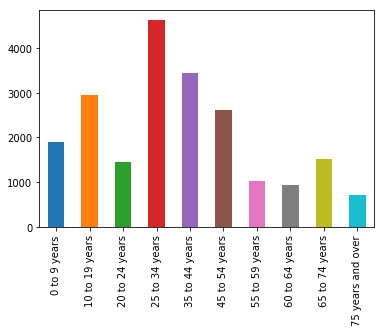

In [47]:
library['Age Range'].value_counts().sort_index().plot(kind = 'bar')

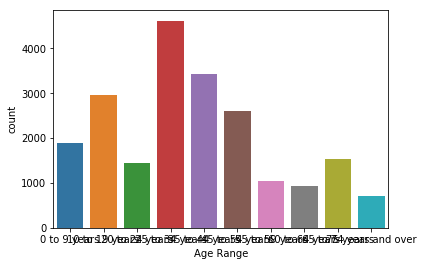

In [50]:
sns.countplot(x = 'Age Range', data = library)

In [51]:
libr

,description,Data Type,Data Type Info,Missing Values
column_name,,,,
Patron Type,"Description of patron (adult, teen, ...",object,nominal,0
Age Range,"Age ranges: 0 to 9 years, 10 to 19 y...",object,ordinal,17
Home Library,Description of the branch library wh...,object,ordinal,0
Active Date,Date the patron last checked out lib...,object,continuous,3391
Checkouts,Total number of items the patron has...,int64,continuous,0
Renewals,Total number of times the patron has...,int64,continuous,0
Notice Preference,Description of the patron’s preferre...,object,nominal,0
Year Patron Registered,Year patron registered with library ...,int64,continuous,0
Outside of County,If a patron's home address is not in...,bool,nominal,0


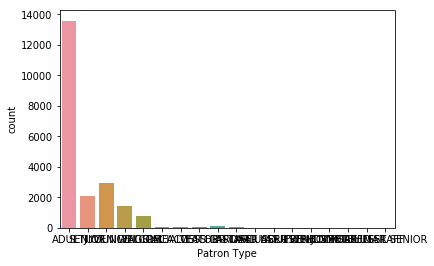

In [52]:
sns.countplot(x = 'Patron Type', data = library)

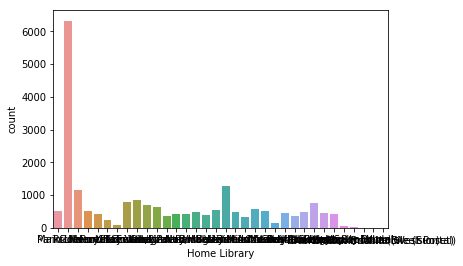

In [53]:
sns.countplot(x = 'Home Library', data = library)

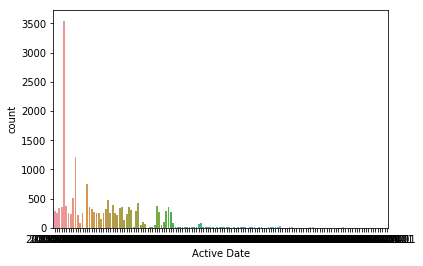

In [54]:
sns.countplot(x = 'Active Date', data = library)

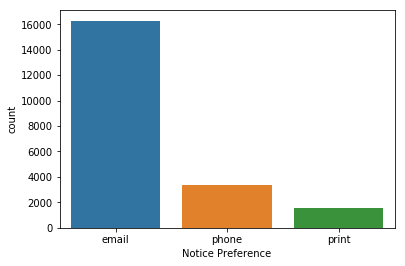

In [55]:
sns.countplot(x = 'Notice Preference', data = library)

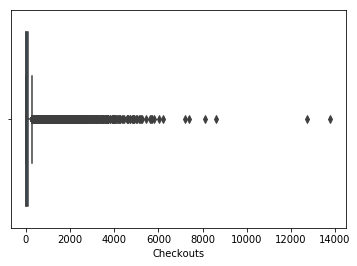

In [57]:
sns.boxplot(x = 'Checkouts', data = library)